In [1]:
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
businessesWithTIF = pd.read_csv('BusWithTIF.csv')

In [3]:
tif_geo = gpd.read_file('Boundaries TIF.geojson')
# Set the coordinate reference system to the standard latitude/longitude system
tif_geo = tif_geo.set_crs(epsg=4326)

frame = gpd.read_file('BoundariesCommunity.geojson')

tif_geo = gpd.read_file('Boundaries TIF.geojson')
# Set the coordinate reference system to the standard latitude/longitude system
tif_geo = tif_geo.set_crs(epsg=4326)

In [4]:
# just plotted the first 1000 of the bussinesses
businessesWithTIF = businessesWithTIF.head(10000)
namesAndLocations = businessesWithTIF[['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]


<AxesSubplot: >

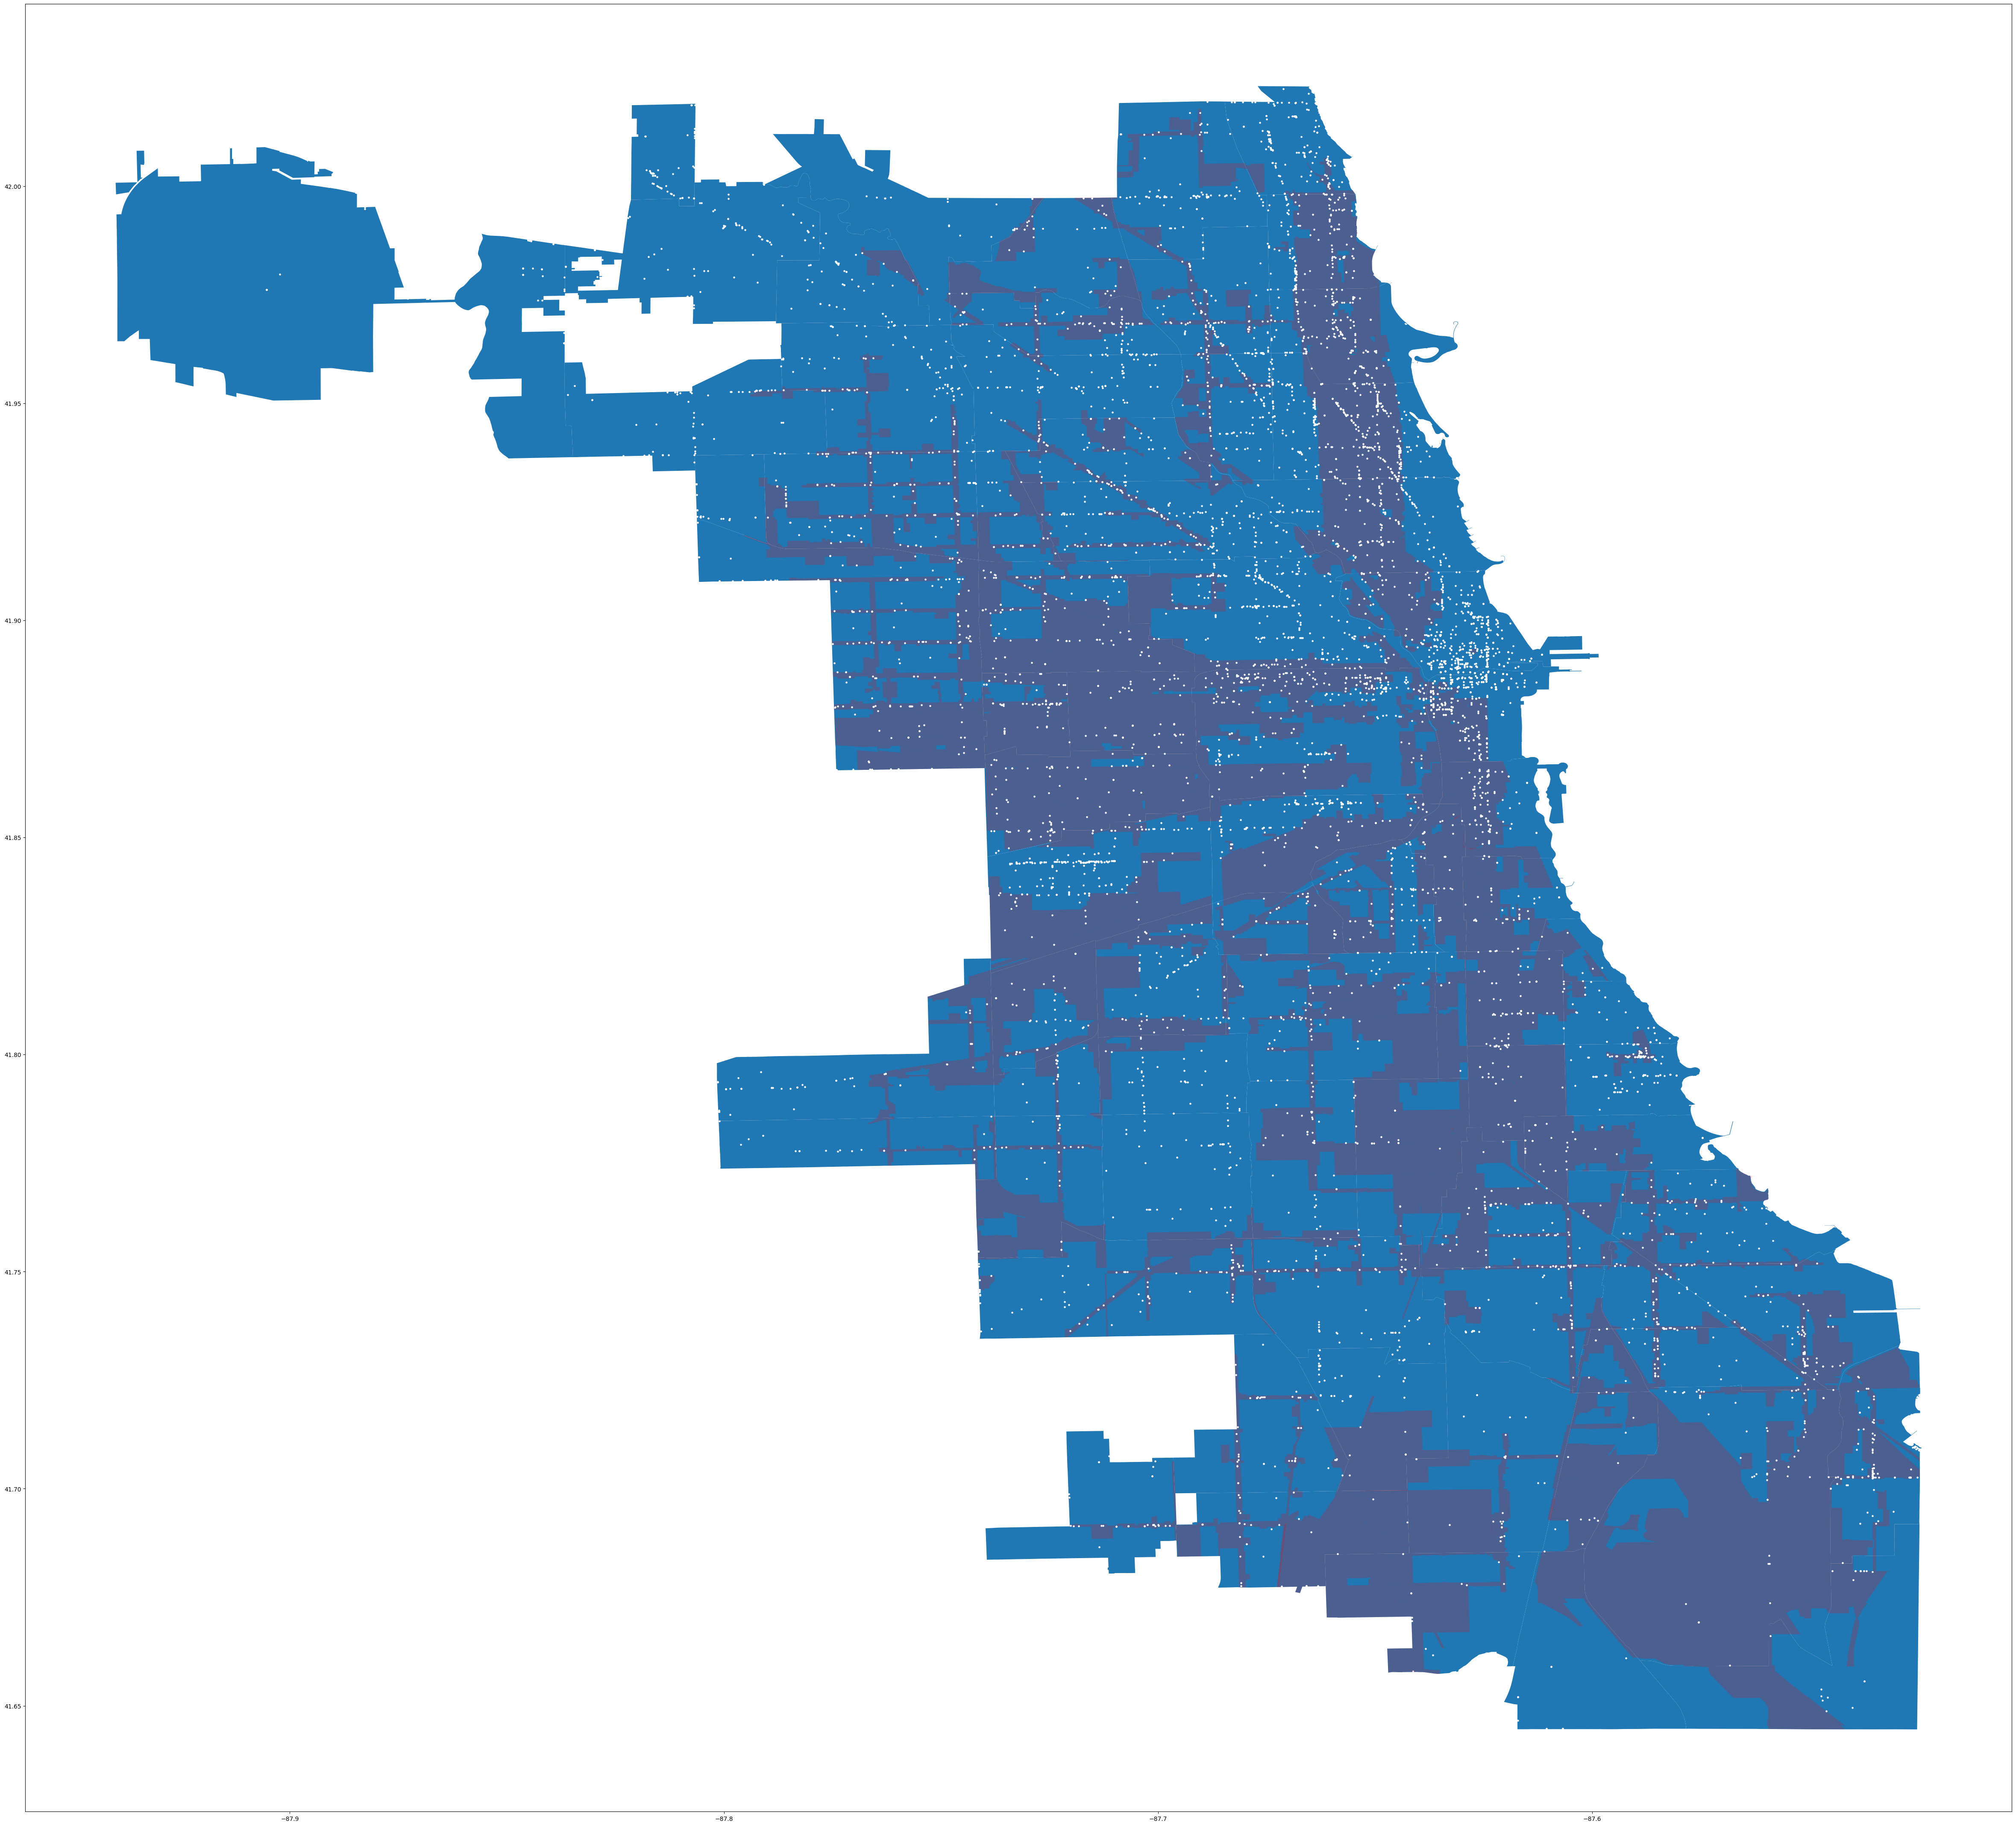

In [5]:
gdf_points = gpd.GeoDataFrame(
    namesAndLocations, geometry=gpd.points_from_xy(namesAndLocations.LONGITUDE, namesAndLocations.LATITUDE))

# adjust size by changing figsize(width, height)
fig, ax = plt.subplots(1, 1, figsize=(60, 70))

# Plot MultiPolygons
frame.plot(ax=ax)
tif_geo.plot(ax=ax, color='red', alpha=.2)

# Plot longitude-latitude points with names
gdf_points.plot(ax=ax, color='white', markersize=5)




# Small Businesses

In [6]:
small_business_df = pd.read_csv('/work/Business Info By Size/SmallBusinessInfo.csv')

In [7]:
# print(len(small_business_df.iloc[2]['TIF_Name']))
# len(small_business_df.iloc[1]['TIF_Name'])
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

small_business_df = pd.read_csv('/work/Business Info By Size/SmallBusinessInfo.csv')
def getInOutIndices(df):
    inTIF = []
    outTIF = []
    for index, row in df.iterrows():
        if len(row['TIF_Name']) <= 2:
            outTIF.append(index)
        else:
            inTIF.append(index)
    
    return inTIF, outTIF

small_business_in, small_business_out = getInOutIndices(small_business_df)
small_business_in_df = small_business_df.iloc[small_business_in][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE', 'TIF_Name']]
small_business_out_df = small_business_df.iloc[small_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

In [8]:
small_business_in_df

LEGAL_NAME   LATITUDE  LONGITUDE
2                      DOMONANT MEDIA LLC  41.830729 -87.655813
8           A&J MUFFLERS AND BRAKES CORP.  41.817929 -87.684830
10          A&J MUFFLERS AND BRAKES CORP.  41.817929 -87.684830
14         PRETTY NAILS OF ILLINOIS, INC.  41.765190 -87.576133
17                ELVIRA TECALERO DEGANTE  41.917209 -87.731694
...                                   ...        ...        ...
363626   BB JEWELRY DESIGNS, INCORPORATED  41.881922 -87.626063
363627            CHICAGO TITLE INSURANCE  41.874450 -87.631544
363629                         S&S 19 LLC  41.924577 -87.710095
363633                        YUDITH VEGA  41.924052 -87.752185
363634  NO.1 ENTERTAINMENT INVESTMENT LLC  41.855282 -87.631993

[172628 rows x 3 columns]

In [9]:
small_business_out_df

LEGAL_NAME   LATITUDE  LONGITUDE
0                    JYM INVESTMENTS LLC  42.019413 -87.688628
1             Silverwolf Productions LLC  41.930322 -87.665387
3                      MOVING UNITS INC.  41.962185 -87.708423
4                            DANIELLE TO  41.843549 -87.646266
5              SUPREME RIMS & TIRES INC.  41.817771 -87.698006
...                                  ...        ...        ...
363625         J.C. MODERN PAINTING, LLC  41.788770 -87.766890
363628  SWEET & SAVORY CHEF SERVICES LLC  41.724860 -87.632296
363630       BIG CITY CONSTRUCTION, INC.  41.921724 -87.757159
363631       LADYBUG MDL VAN BUREN 4 LLC  41.876817 -87.647353
363632    NEW MILLENNIUM AUTO CARE, INC.  41.950391 -87.747379

[191007 rows x 3 columns]

<AxesSubplot: >

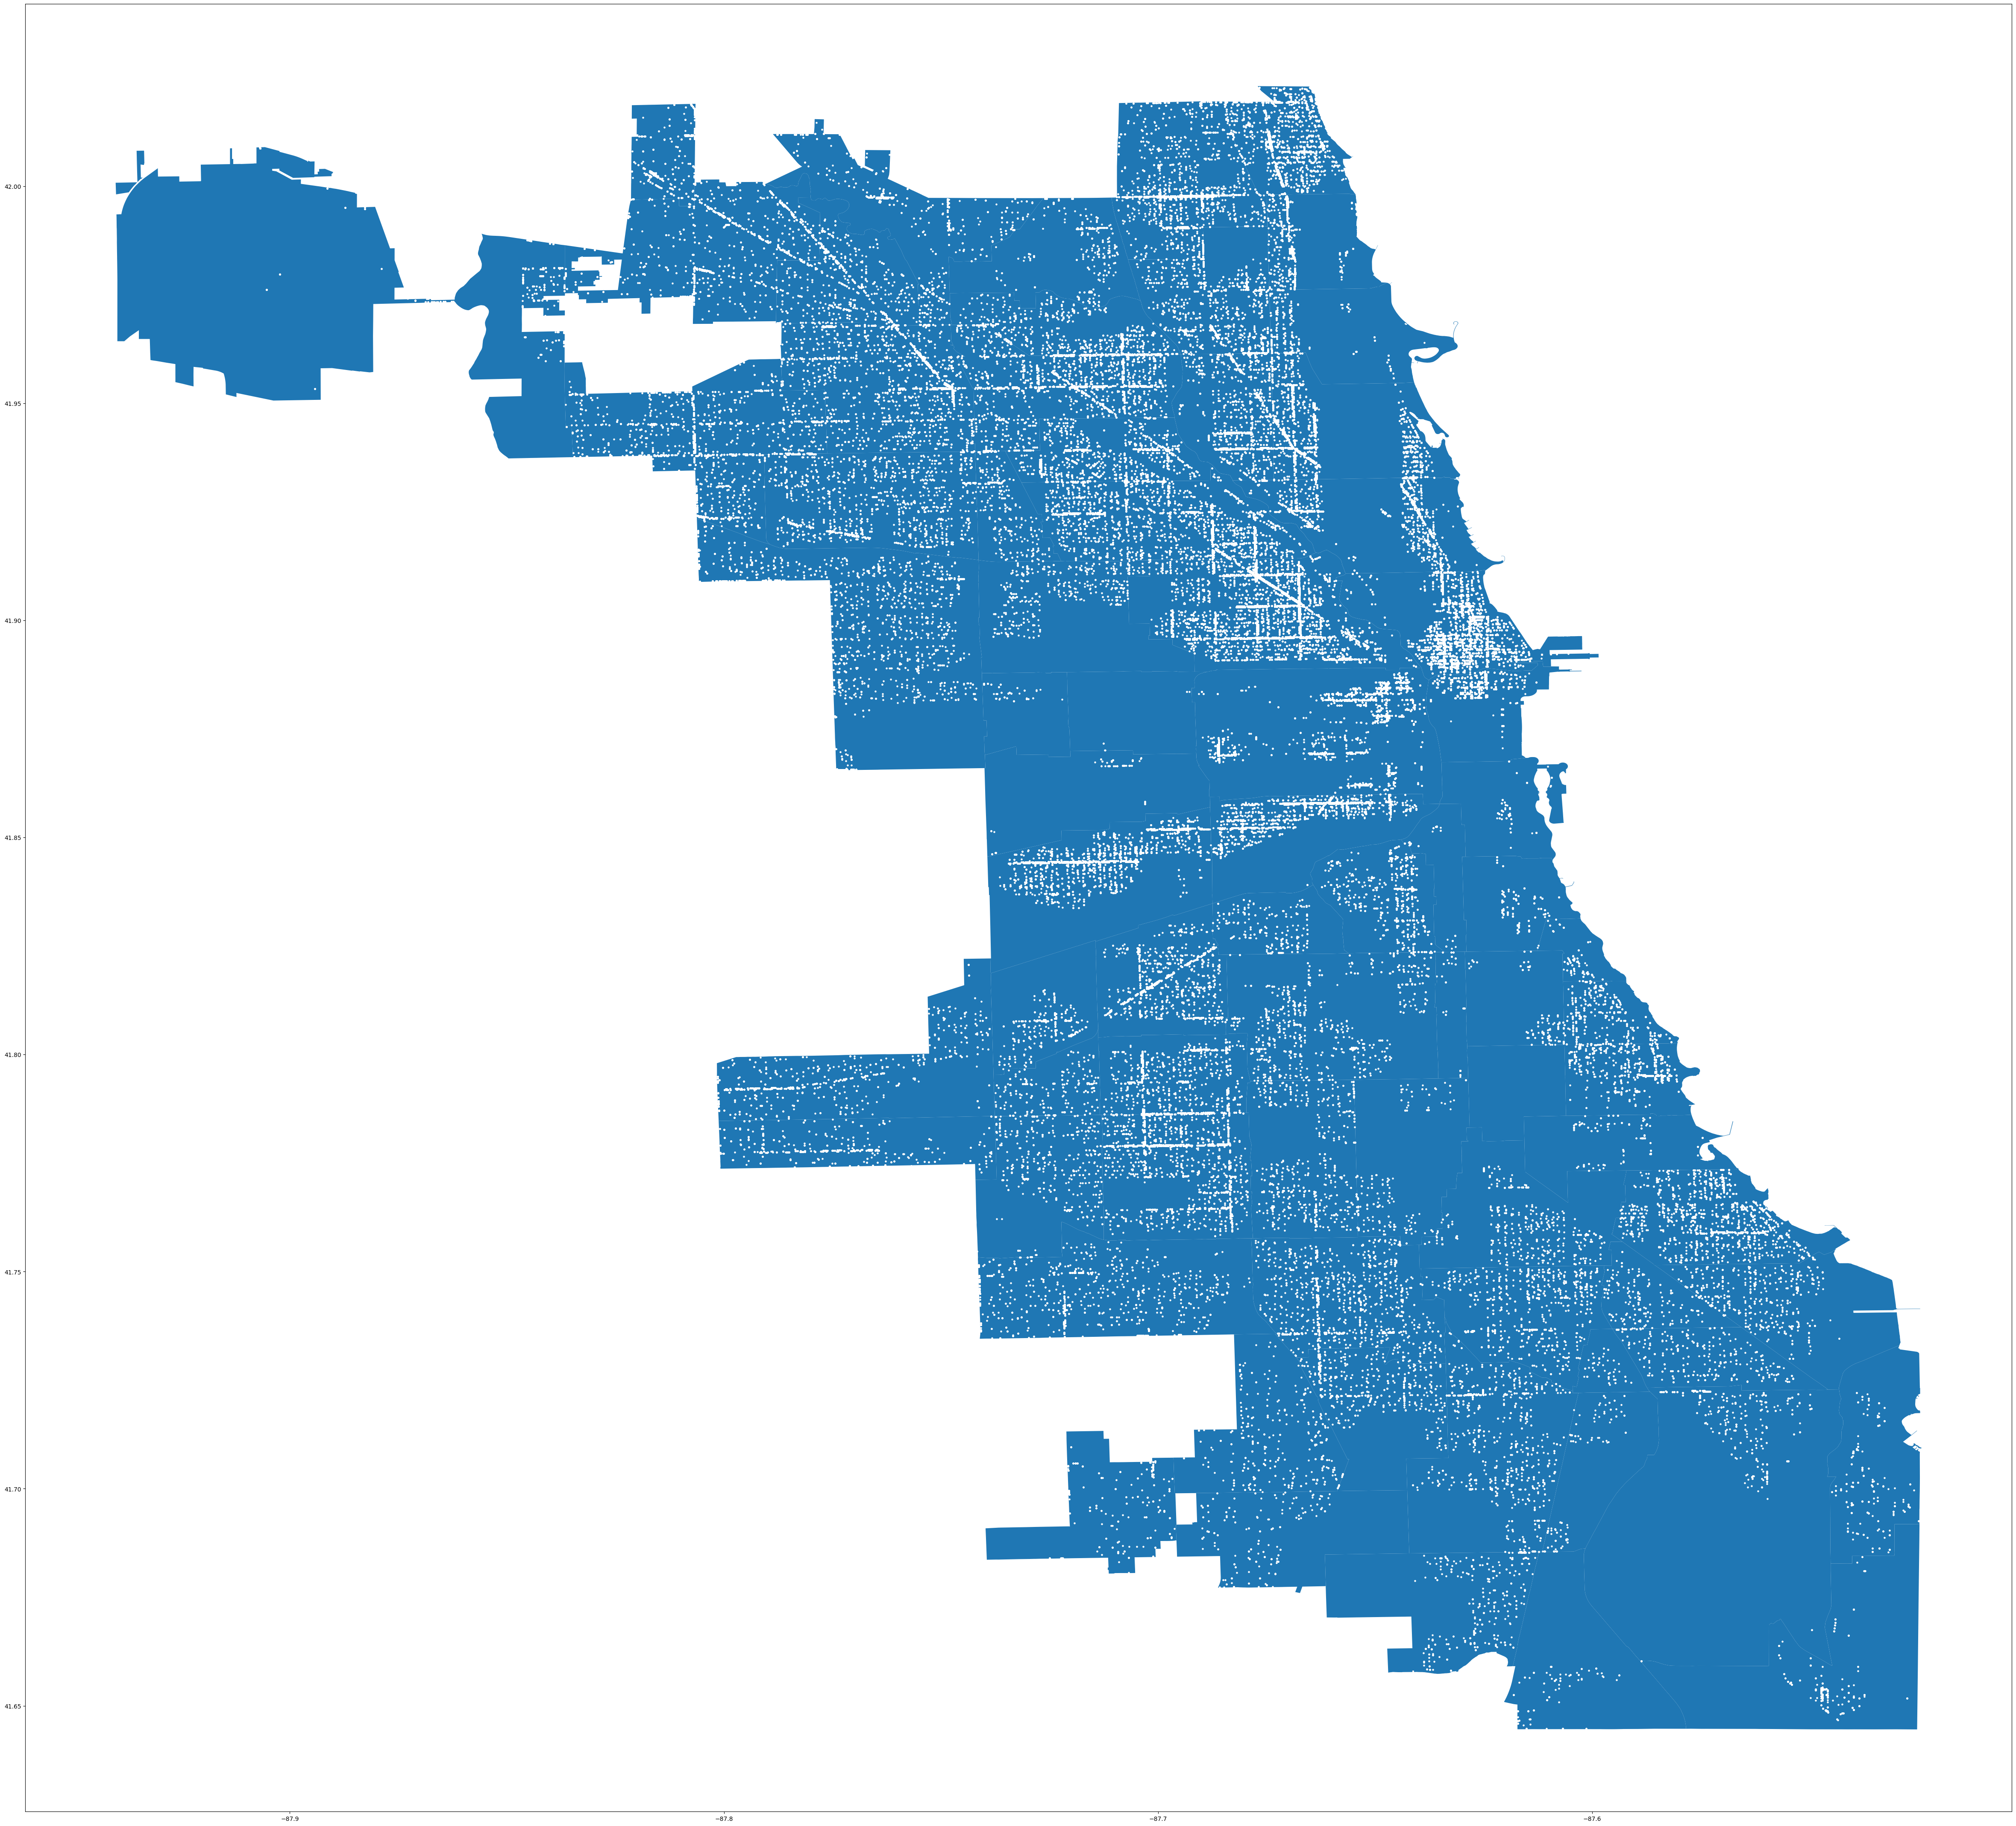

In [10]:
small_business_out_points = gpd.GeoDataFrame(
    small_business_out_df, geometry=gpd.points_from_xy(small_business_out_df.LONGITUDE, small_business_out_df.LATITUDE))

# adjust size by changing figsize(width, height)
fig, ax = plt.subplots(1, 1, figsize=(60, 70))

# Plot MultiPolygons
frame.plot(ax=ax)

# Plot longitude-latitude points with names
small_business_out_points.plot(ax=ax, color='white', markersize=5)

<AxesSubplot: >

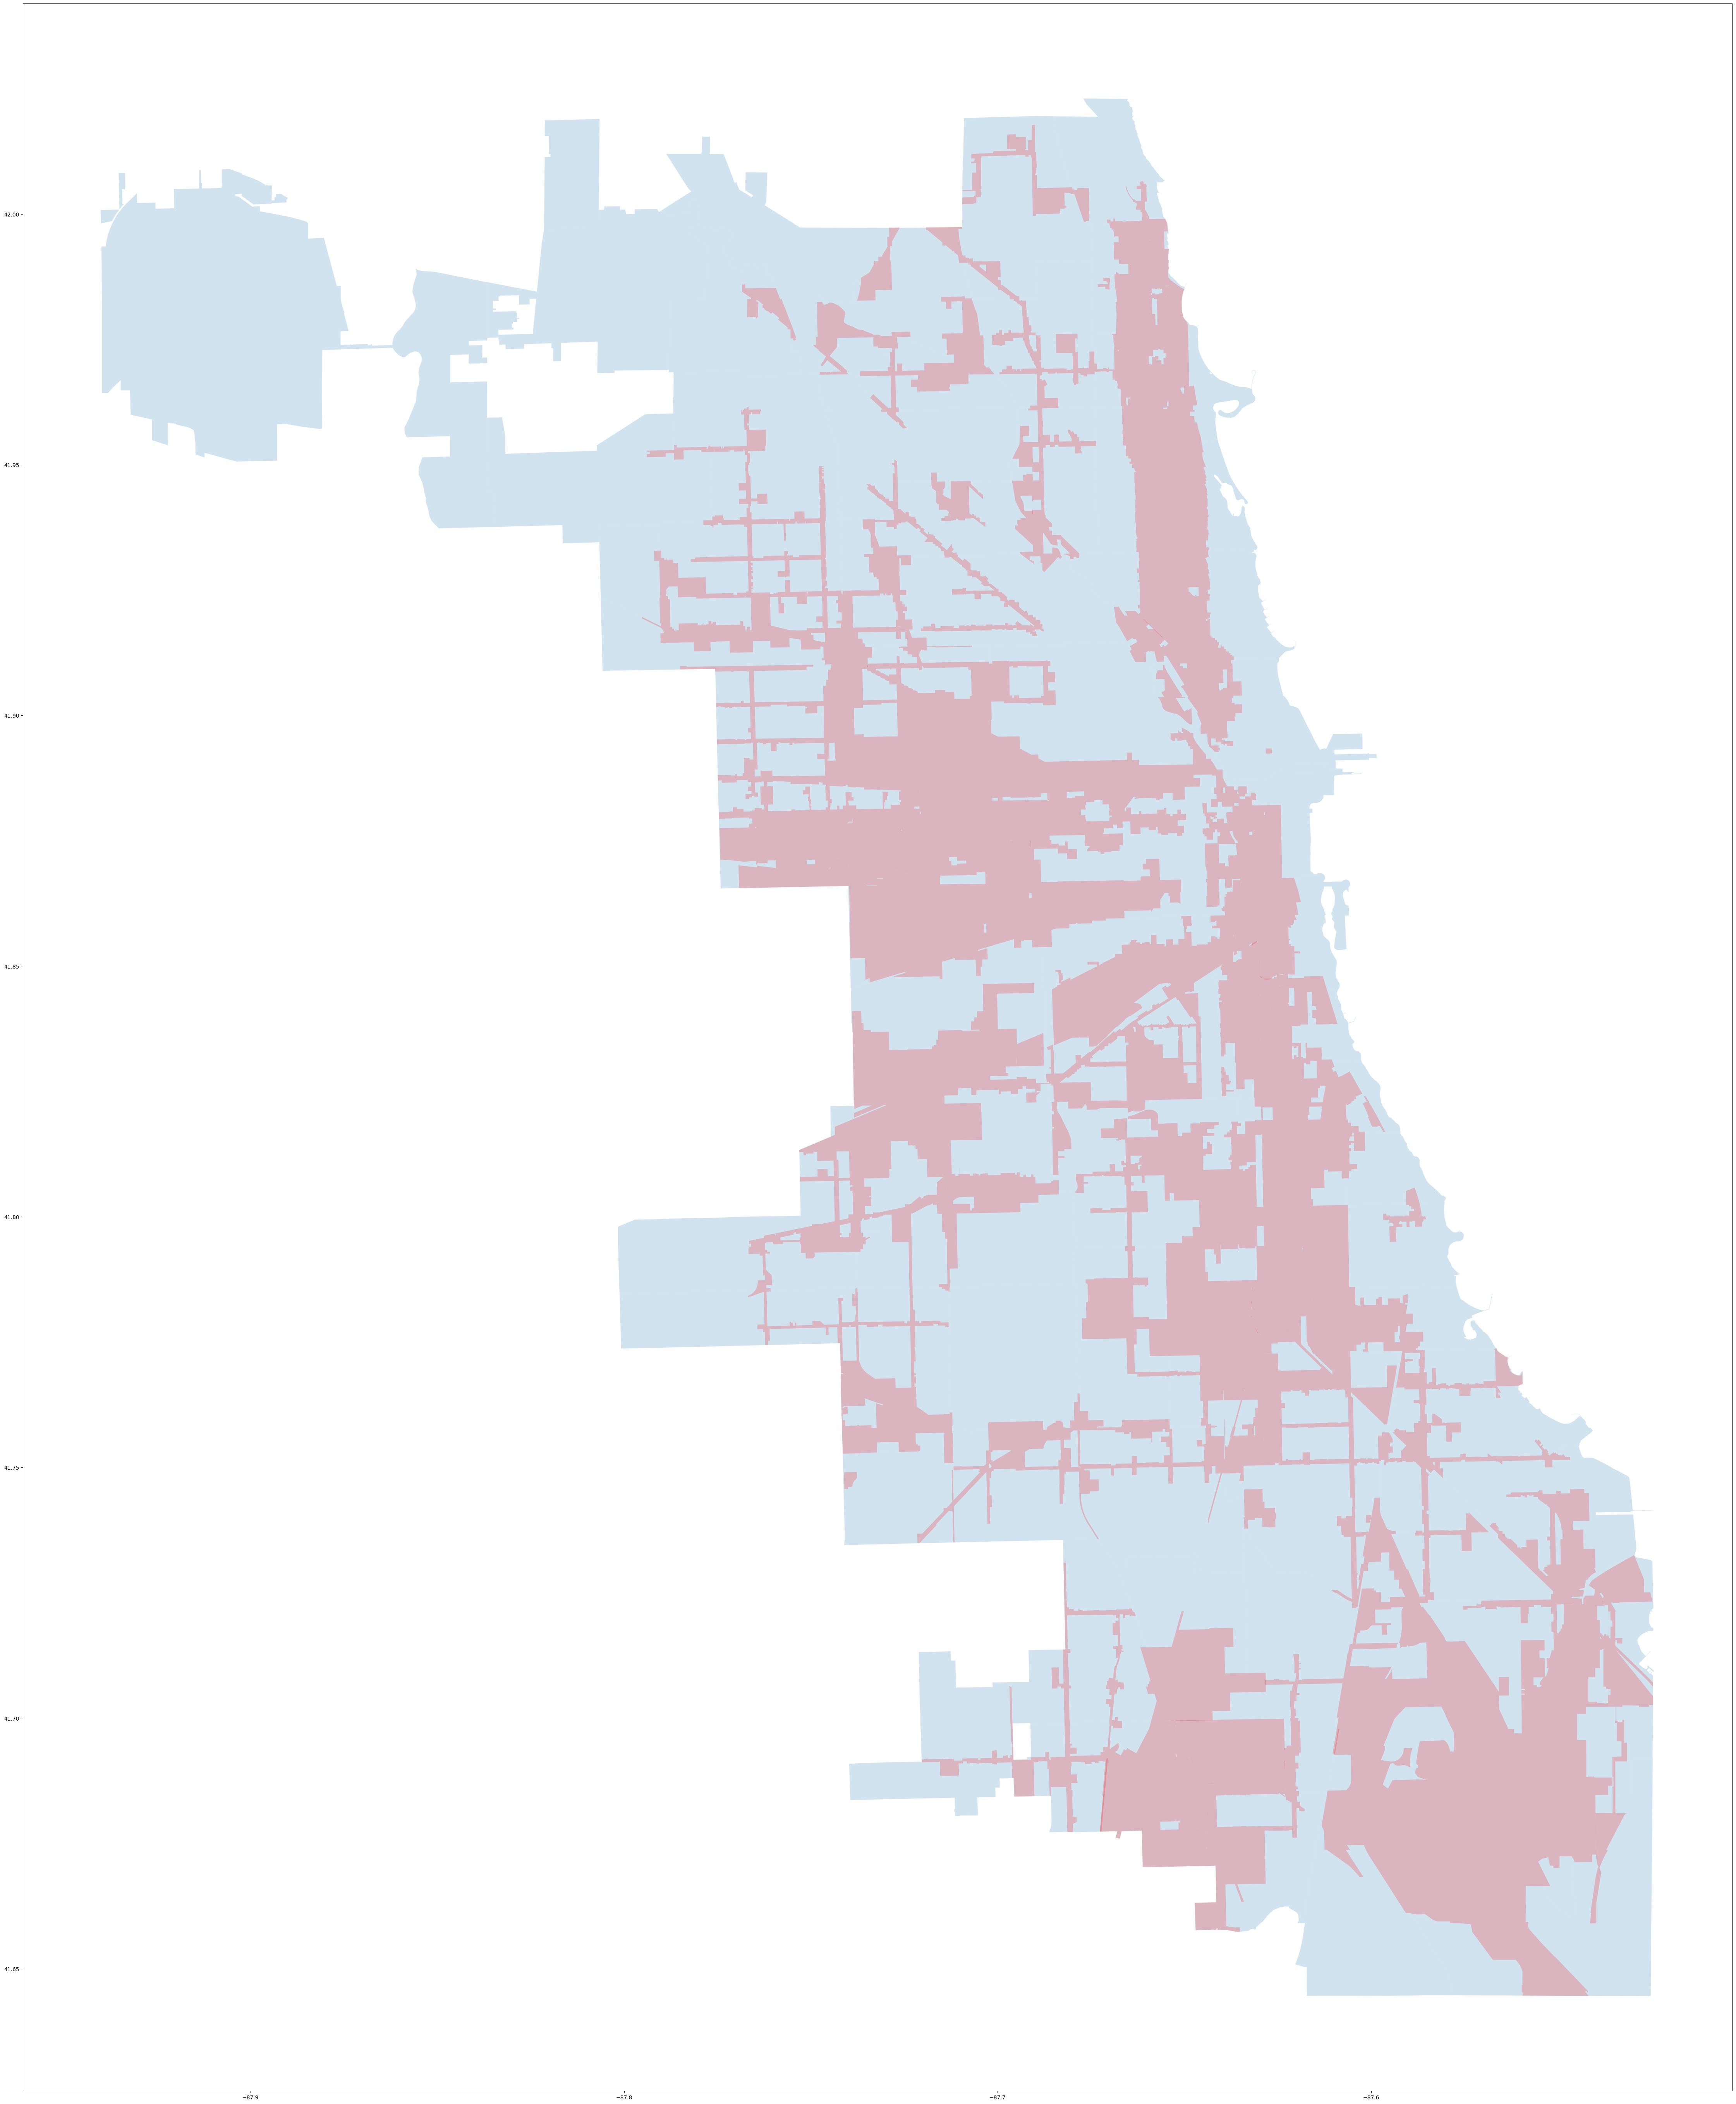

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(60, 70))

# Plot MultiPolygons
frame.plot(ax=ax, alpha = .2)
tif_geo.plot(ax=ax, color='red', alpha=.2)

# Medium

In [12]:
medium_business_df = pd.read_csv('/work/Business Info By Size/MediumBusinessInfo.csv')

In [13]:
medium_business_in, medium_business_out = getInOutIndices(medium_business_df)
medium_business_in_df = medium_business_df.iloc[medium_business_in][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]
medium_business_out_df = medium_business_df.iloc[medium_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

In [14]:
medium_business_in_df

LEGAL_NAME   LATITUDE  LONGITUDE
3         FLYING SQUIRREL INDUSTRIES LLC  41.924150 -87.699151
6           STANLEY BROWN JEWELIST, LTD.  41.968002 -87.688007
9              CHICAGO ANODIZING COMPANY  41.885742 -87.728834
13                    J & H DESIGNS INC.  42.012484 -87.690099
15            MAK FUEL & MINI MART, INC.  41.854983 -87.724996
...                                  ...        ...        ...
354473  CABRERA CAPITAL MANAGEMENT, INC.  41.881675 -87.632504
354474                      KOBOTECH INC  41.881900 -87.624507
354477          LOOP CAPITAL MARKETS LLC  41.878014 -87.633189
354479          LOOP CAPITAL MARKETS LLC  41.878034 -87.631171
354482                    INSIGNIS, INC.  41.881990 -87.632213

[176818 rows x 3 columns]

In [15]:
medium_business_out_df

LEGAL_NAME   LATITUDE  LONGITUDE
0                 ELIAS A. KANELLOPOULOS  41.899355 -87.621791
1                 ELIAS A. KANELLOPOULOS  41.899355 -87.621791
2                 ELIAS A. KANELLOPOULOS  41.899281 -87.618895
4              MIGUEL ANGEL DUARTE-SOLIS  41.802569 -87.674396
5                           WING YIP INC  41.845284 -87.641495
...                                  ...        ...        ...
354480        ALAIN LOCKE CHARTER SCHOOL  41.884531 -87.624602
354481      TRANSAGRA INTERNATIONAL INC.  41.884636 -87.624314
354483  GUARANTEED MEDICAL SERVICE, INC.  41.792122 -87.787572
354484                   EL VIAJERO INC.  41.786499 -87.694482
354485         PACO COMMUNICATIONS, INC.  41.876621 -87.648514

[177668 rows x 3 columns]

<AxesSubplot: >

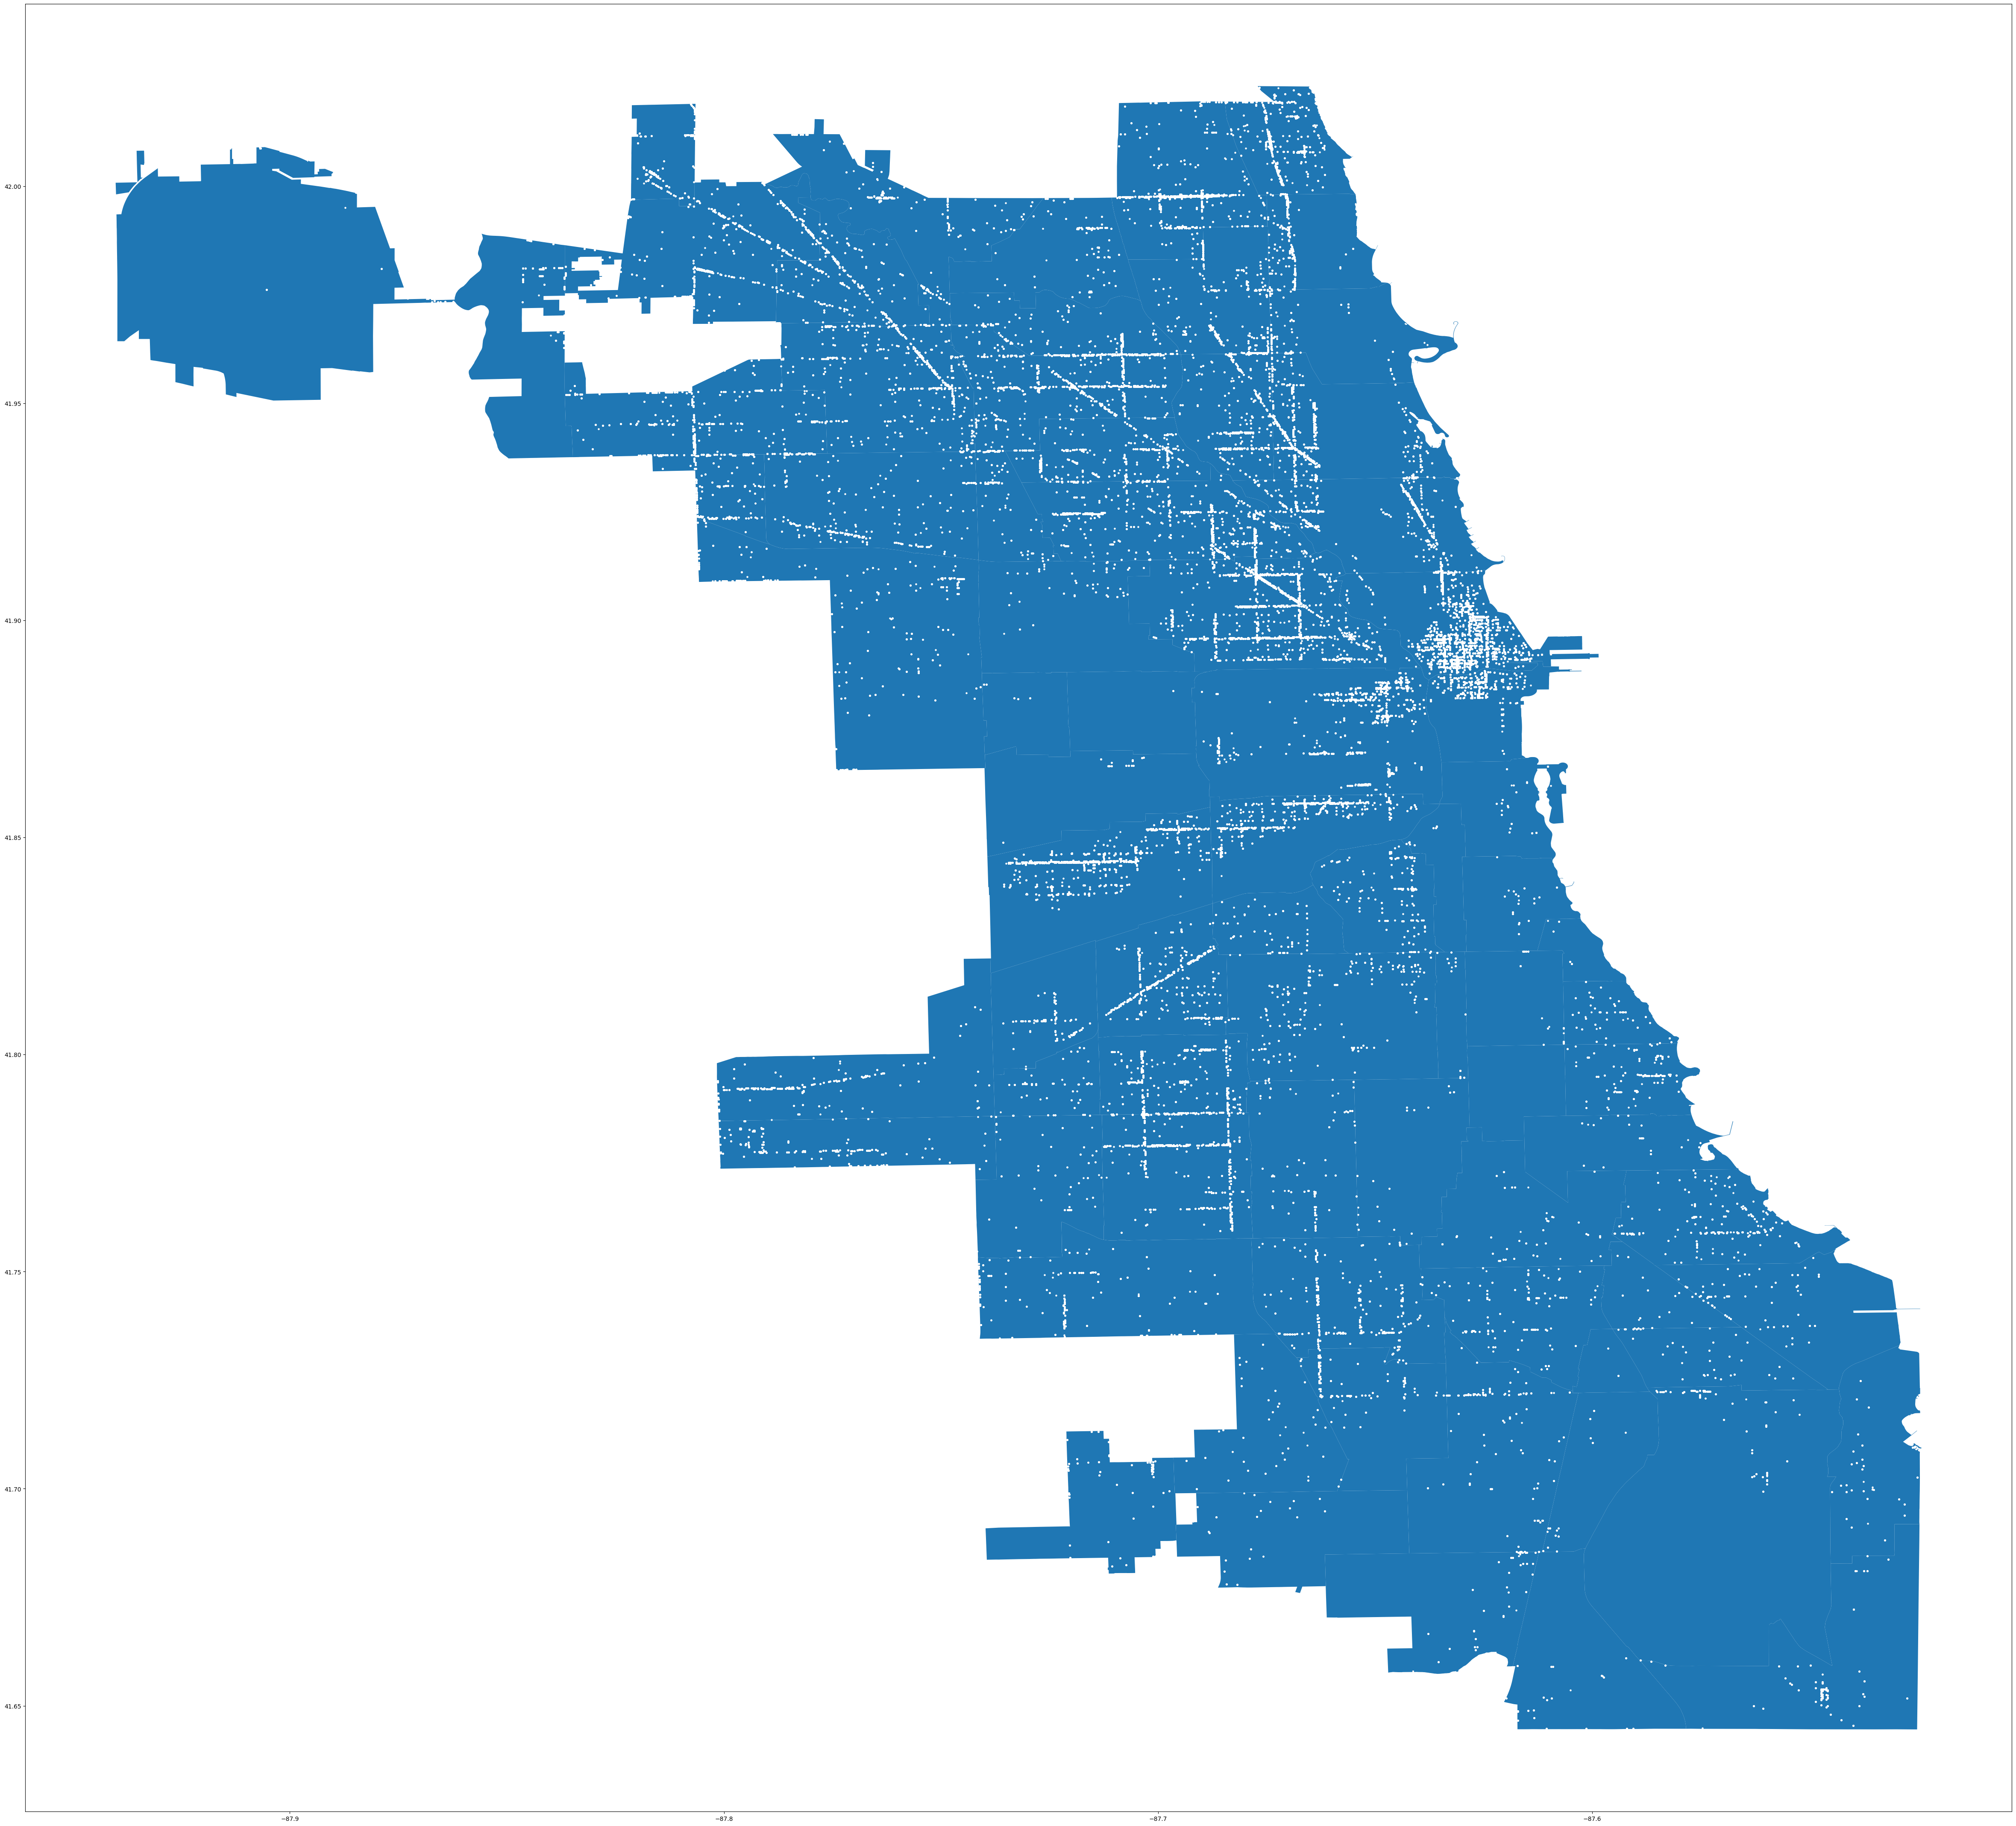

In [16]:
medium_business_out_points = gpd.GeoDataFrame(
    medium_business_out_df, geometry=gpd.points_from_xy(medium_business_out_df.LONGITUDE, medium_business_out_df.LATITUDE))

# adjust size by changing figsize(width, height)
fig, ax = plt.subplots(1, 1, figsize=(60, 70))

# Plot MultiPolygons
frame.plot(ax=ax)

# Plot longitude-latitude points with names
medium_business_out_points.plot(ax=ax, color='white', markersize=5)

<AxesSubplot: >

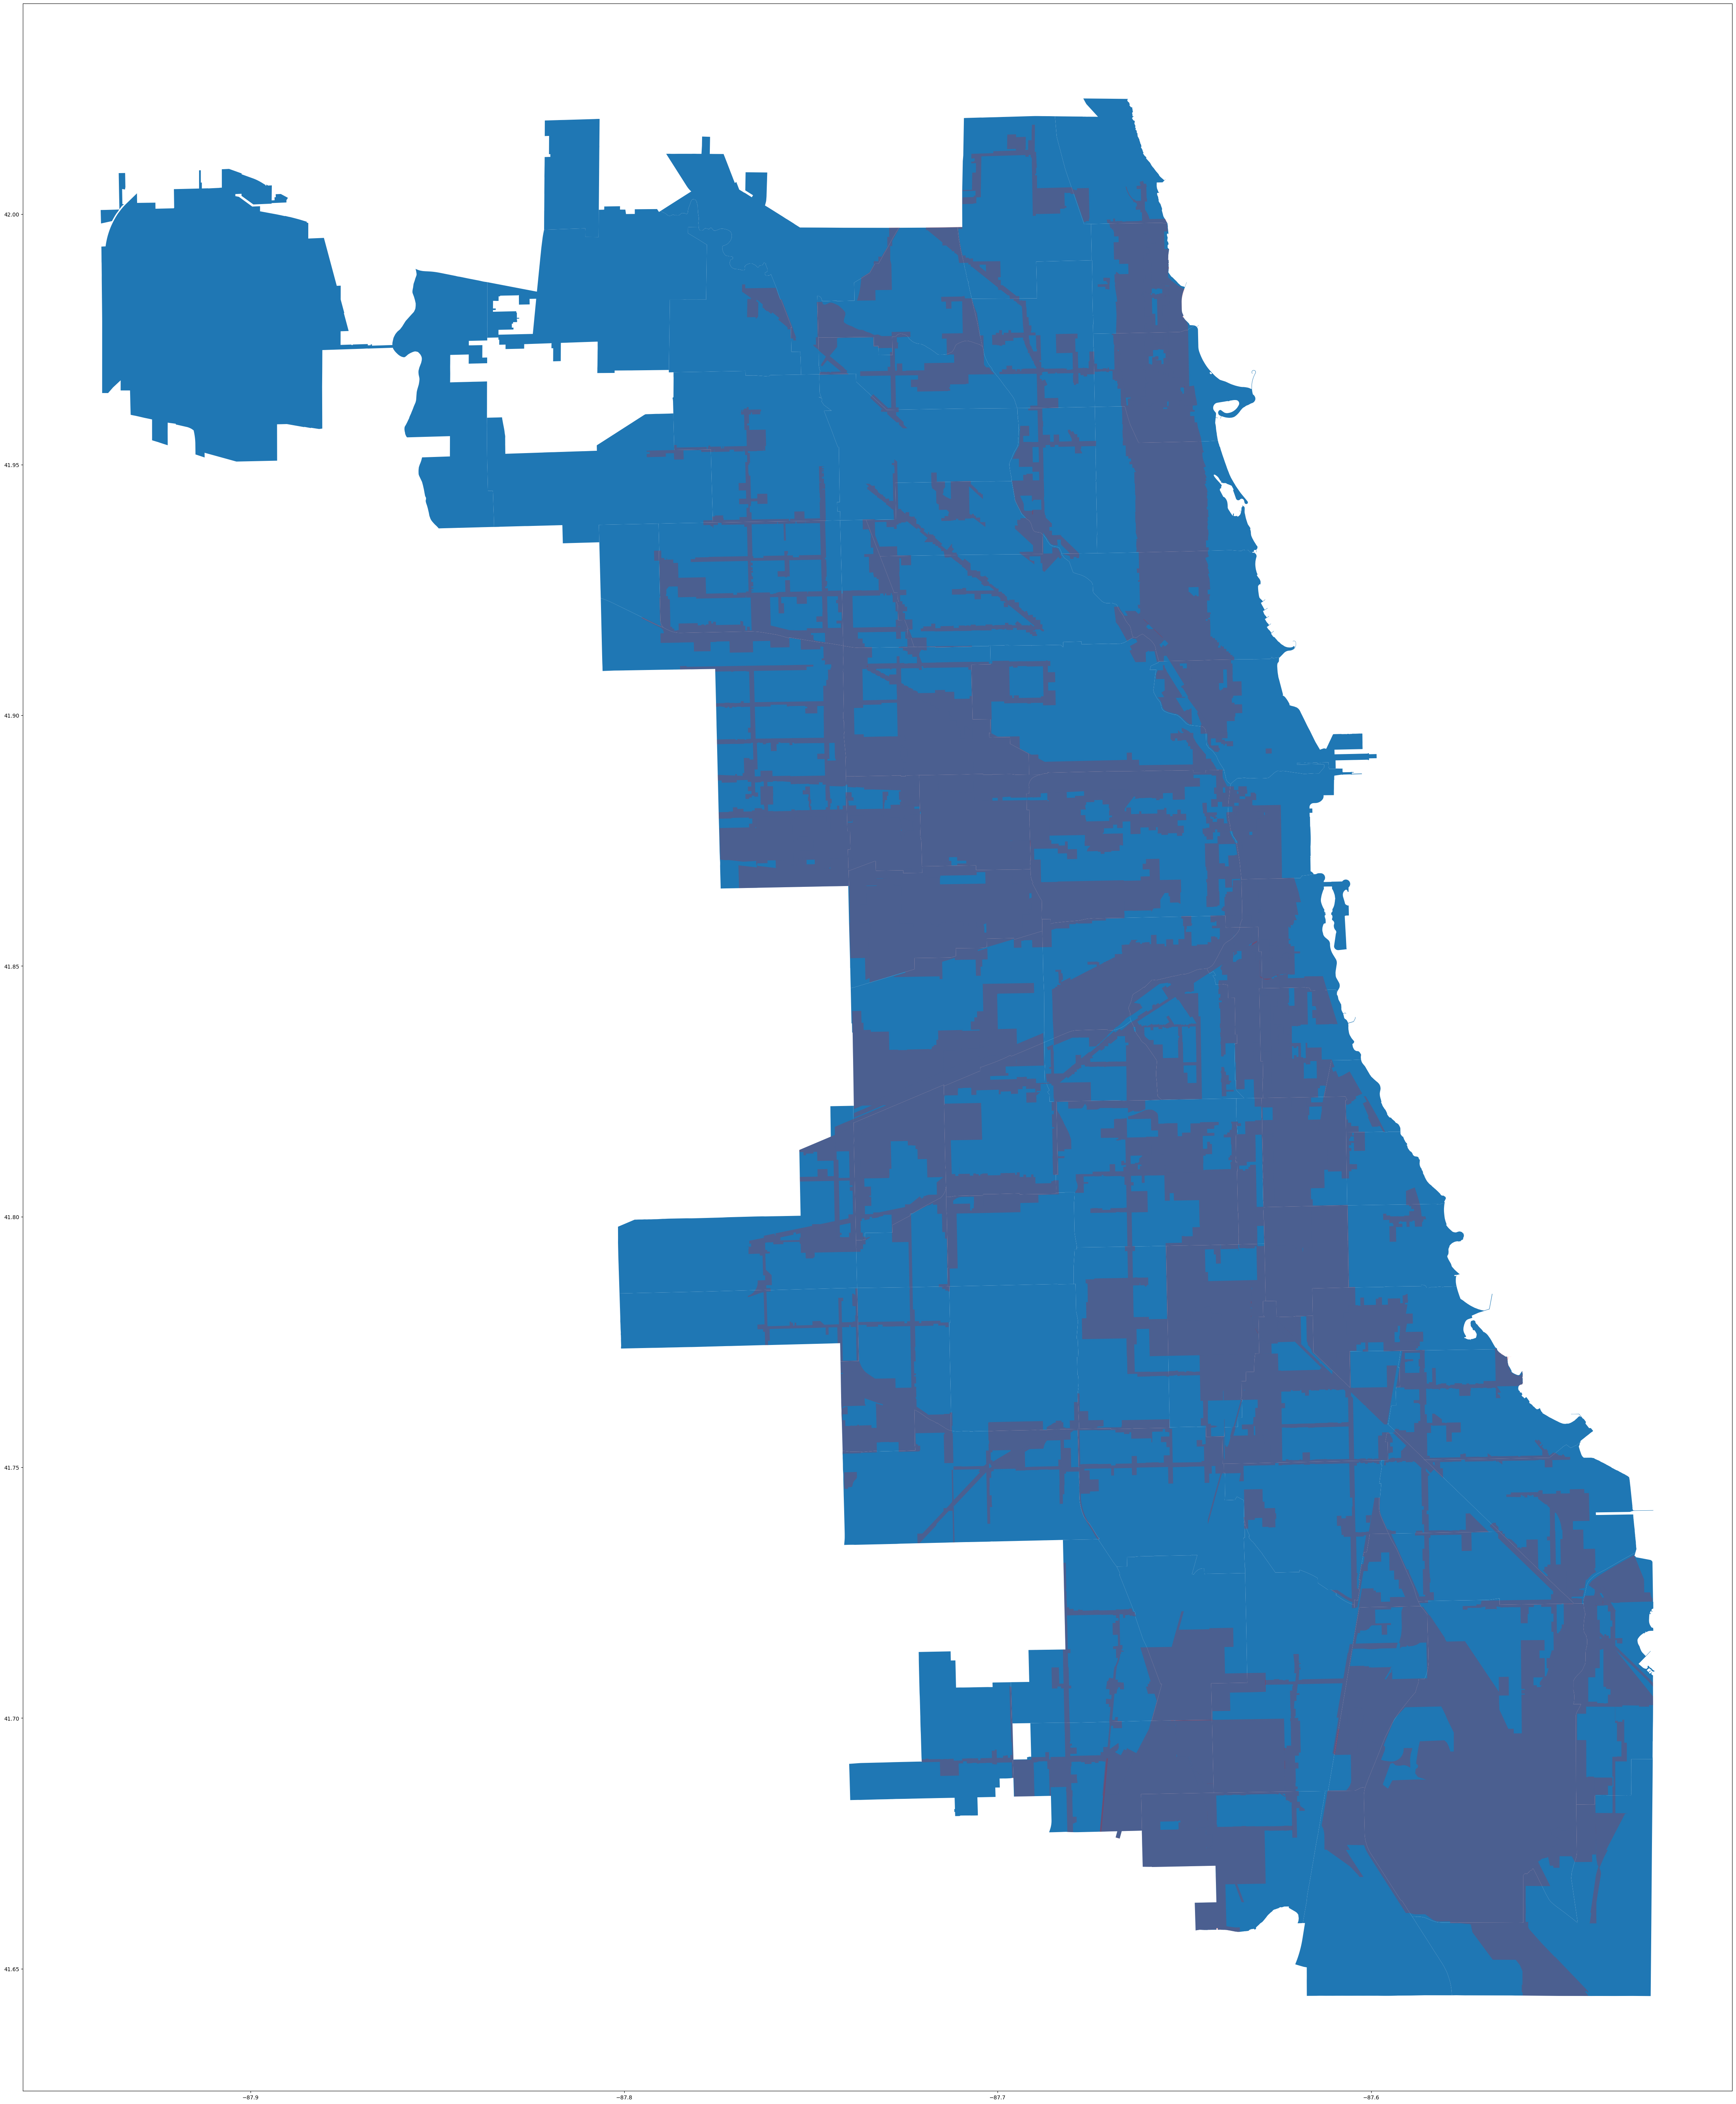

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(60, 70))

# Plot MultiPolygons
frame.plot(ax=ax)
tif_geo.plot(ax=ax, color='red', alpha=.2)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>